In [38]:
from scipy import stats

In [39]:
import pandas as pd
import pandas_datareader as web
import yfinance as yf


In [40]:
spy_etf = yf.download('SPY', start, end)


[*********************100%%**********************]  1 of 1 completed


In [41]:
spy_etf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1902 entries, 2010-01-04 to 2017-07-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1902 non-null   float64
 1   High       1902 non-null   float64
 2   Low        1902 non-null   float64
 3   Close      1902 non-null   float64
 4   Adj Close  1902 non-null   float64
 5   Volume     1902 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 104.0 KB


In [42]:
spy_etf.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,86.580727,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,86.809937,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,86.871048,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,87.237724,131091100
2010-01-08,113.889999,114.620003,113.660004,114.570000,87.528061,126402800


In [43]:
start = pd.to_datetime('2010-01-04')
end = pd.to_datetime('2017-07-25')

In [44]:
aapl = yf.download('AAPL', start, end)


[*********************100%%**********************]  1 of 1 completed


In [45]:
aapl.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.454506,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.465665,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.362819,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.351056,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.393280,447610800


In [46]:
aapl.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-07-18,37.299999,37.532501,37.167500,37.520000,35.080952,71475200
2017-07-19,37.619999,37.855000,37.487499,37.755001,35.300678,83692000
2017-07-20,37.875000,37.935001,37.547501,37.584999,35.141720,68974800
2017-07-21,37.497501,37.610001,37.220001,37.567501,35.125378,105010400
2017-07-24,37.645000,38.110001,37.474998,38.022499,35.550793,85972800


In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

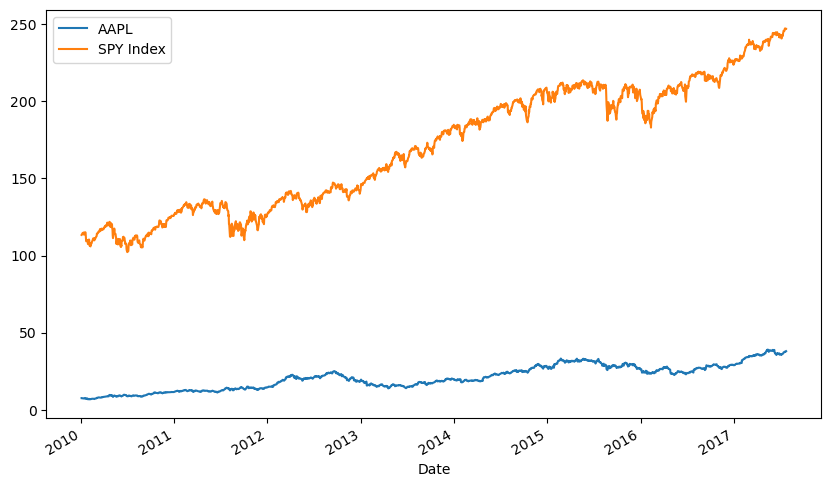

In [50]:
aapl['Close'].plot(label='AAPL', figsize=(10,6))
spy_etf['Close'].plot(label='SPY Index')
plt.legend()

In [51]:
aapl['Cumulative'] = aapl['Close']/aapl['Close'].iloc[0]
spy_etf['Cumulative'] = spy_etf['Close']/spy_etf['Close'].iloc[0]

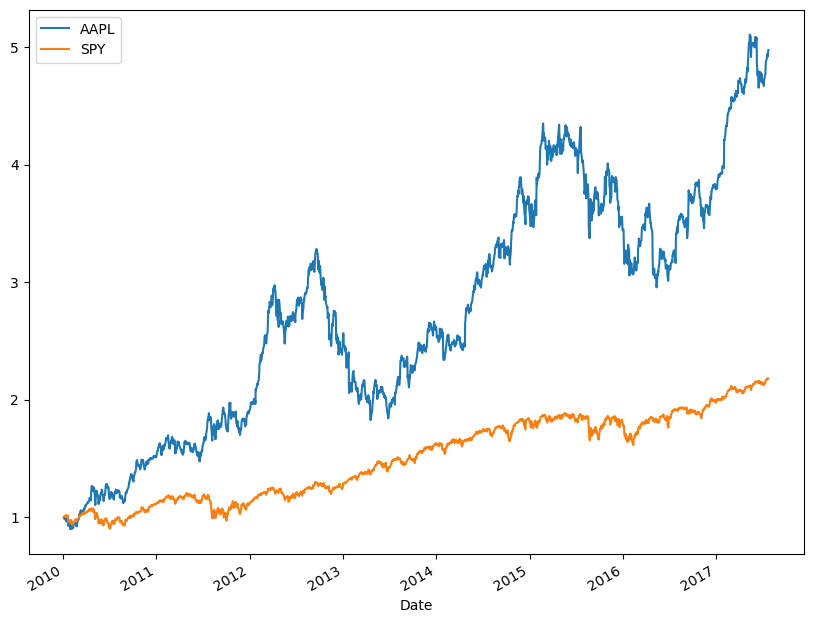

In [52]:
# This shows us that if u had invested a dollar in S&P 500 vs apple you wouldve done well in investing in apple
aapl['Cumulative'].plot(label='AAPL', figsize=(10,8))
spy_etf['Cumulative'].plot(label='SPY')
plt.legend()

In [53]:
aapl['Daily Return'] = aapl['Close'].pct_change(1)
spy_etf['Daily Return'] = spy_etf['Close'].pct_change(1)

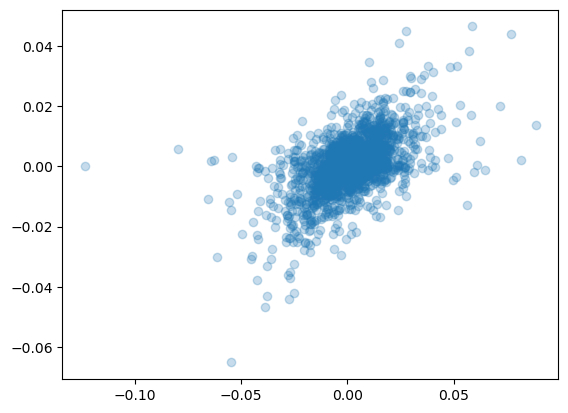

In [54]:
plt.scatter(aapl['Daily Return'], spy_etf['Daily Return'], alpha=0.25)

In [57]:
beta

0.32563874910169055

In [58]:
alpha

0.00013697158935440707

In [59]:
r_value

0.5555814950667347

In [60]:
spy_etf['Daily Return'].head()

Date
2010-01-04         NaN
2010-01-05    0.002647
2010-01-06    0.000704
2010-01-07    0.004221
2010-01-08    0.003328
Name: Daily Return, dtype: float64

In [63]:
import numpy as np


noise = np.random.normal(0,0.001,len(spy_etf['Daily Return'].iloc[1:]))

In [64]:
noise

array([ 0.00122623, -0.00031935, -0.00024753, ...,  0.00067649,
        0.0009939 , -0.00051114])

In [66]:
fake_stock= spy_etf['Daily Return'].iloc[1:] +noise

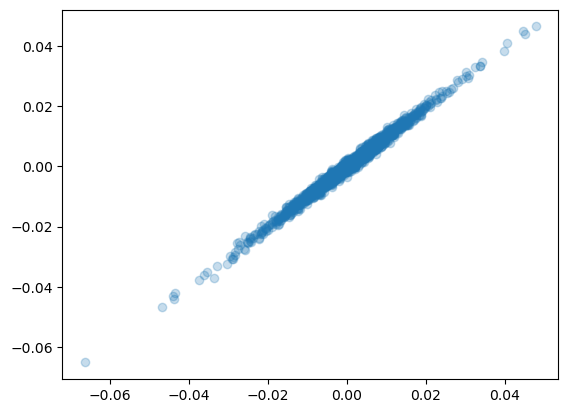

In [68]:
plt.scatter(fake_stock,spy_etf['Daily Return'].iloc[1:], alpha=0.25)

# We can see that it has a linear behavior becuase its the daily return with just some noise and that width is that noise
# So we would have a high beta value

In [69]:
#Tuple unpacking
beta, alpha, r_value, p_value, std_err = stats.linregress(fake_stock,spy_etf['Daily Return'].iloc[1:])

In [70]:
# Almost 1 because it aligns with the daily return 
# So if the a stock that moves with the index has a high beta value 
beta

0.9936452318202501

In [71]:
# extremely small   
alpha

-3.819849006075741e-05